In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

from models.lstm import LstmModel
import data
import gensim.downloader

In [3]:
BATCH_SIZE = 64
train_ds = data.train_ds.padded_batch(BATCH_SIZE).repeat()
test_ds = data.test_ds.padded_batch(BATCH_SIZE).repeat()

In [4]:
# glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')
# word_index = tf.keras.datasets.reuters.get_word_index()

# embeddings = np.zeros((data.vocab_size, 50))
# for word, idx in word_index.items():
#     break
#     if word in glove_vectors:
#         embeddings[idx] = glove_vectors[word]
        
embeddings = None

In [5]:
model = LstmModel(data.num_classes, data.vocab_size, embeddings=embeddings)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [6]:
history = model.fit(train_ds, validation_data=test_ds, steps_per_epoch=data.x_train.shape[0]//BATCH_SIZE, validation_steps=data.x_test.shape[0]//BATCH_SIZE, epochs=200)

Epoch 1/200
140/140 [==============================] - 40s 241ms/step - loss: 7.4849 - accuracy: 0.4664 - val_loss: 2.2070 - val_accuracy: 0.5464
Epoch 2/200
140/140 [==============================] - 33s 236ms/step - loss: 2.1194 - accuracy: 0.5800 - val_loss: 2.1749 - val_accuracy: 0.5813
Epoch 3/200
140/140 [==============================] - 33s 238ms/step - loss: 2.0594 - accuracy: 0.6219 - val_loss: 2.1821 - val_accuracy: 0.6183
Epoch 4/200
140/140 [==============================] - 33s 234ms/step - loss: 2.0022 - accuracy: 0.6679 - val_loss: 2.0113 - val_accuracy: 0.6558
Epoch 5/200
140/140 [==============================] - 33s 238ms/step - loss: 1.9587 - accuracy: 0.6787 - val_loss: 1.9366 - val_accuracy: 0.6772
Epoch 6/200
140/140 [==============================] - 34s 241ms/step - loss: 1.7878 - accuracy: 0.7086 - val_loss: 1.7575 - val_accuracy: 0.7036
Epoch 7/200
140/140 [==============================] - 34s 241ms/step - loss: 1.7472 - accuracy: 0.7114 - val_loss: 1.7745 -

In [7]:
model.save('biLstm')

INFO:tensorflow:Assets written to: biLstm\assets


INFO:tensorflow:Assets written to: biLstm\assets


In [8]:
predictions = model.predict(data.test_ds.padded_batch(BATCH_SIZE).map(lambda x, y:x))
f1_metric = tfa.metrics.F1Score(num_classes=46, average='macro')
f1_metric.update_state(tf.one_hot(data.y_test, depth=46), predictions)

bow_logistic_metrics = {
    'accuracy': tf.keras.metrics.sparse_categorical_accuracy(data.y_test, predictions),
    'top_3_accuracy' : tf.keras.metrics.sparse_top_k_categorical_accuracy(data.y_test, predictions, k=3),
    'top_5_accuracy' : tf.keras.metrics.sparse_top_k_categorical_accuracy(data.y_test, predictions, k=5)
}
bow_logistic_metrics = {k:tf.reduce_mean(v).numpy() for k,v in bow_logistic_metrics.items()}

print('\n'.join([f'{k}:\t{v*100:.2f}%' for k,v in bow_logistic_metrics.items()]))

accuracy:	78.44%
top_3_accuracy:	88.24%
top_5_accuracy:	91.05%


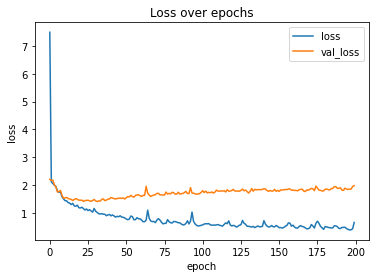

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss over epochs')
plt.legend()

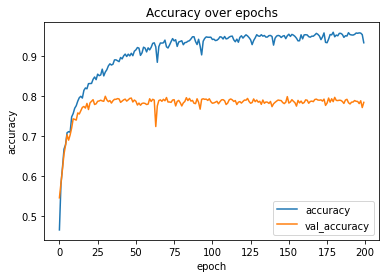

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy over epochs')
plt.legend()